# Discussion #386

Details on an ANDES discussion, https://github.com/CURENT/andes/discussions/386

## Packages version

In [1]:
import numpy as np

import andes

In [2]:
%matplotlib inline

In [3]:
print(andes.__version__)

1.9.1.post24+g7a87ad5d


In [4]:
andes.config_logger(stream_level=50)

## Load case

In [5]:
case0 = andes.get_case('ieee14/ieee14_full.xlsx')

case1 = './ieee14_1.00_Line_12_0.80_1.00_1.30.xlsx'

case2 = './ieee14_1.00_Line_12_0.90_1.00_1.30.xlsx'

case3 = './ieee14_1.00_Line_12_0.95_1.00_1.30.xlsx'

In [6]:
ss0 = andes.load(case0,
                 default_config=True,
                 no_output=True)

ss1 = andes.load(case1,
                 default_config=True,
                 no_output=True)

ss2 = andes.load(case2,
                 default_config=True,
                 no_output=True)

ss3 = andes.load(case3,
                 default_config=True,
                 no_output=True)


In [7]:
andes.config_logger(stream_level=20)

Case0 is the base case in ANDES source repository.

Case1-3 is the revised case.

Case1 runs well, Case2 TDS initialization failed, and Case3 power flow failed.

These errors are common when revising the case and are usually caused by inappropriate parameters.

In below, we will show how to recognize the reasons and fix the errors.


## Case0

In [8]:
ss0.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0039 seconds.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.957087684e-12
Converged in 4 iterations in 0.0035 seconds.


True

In [9]:
ss0i = ss0.TDS.init()

Initialization for dynamics completed in 0.0246 seconds.
Initialization was successful.


In [10]:
ss0.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=20.00 sec completed in 0.3222 seconds.


True

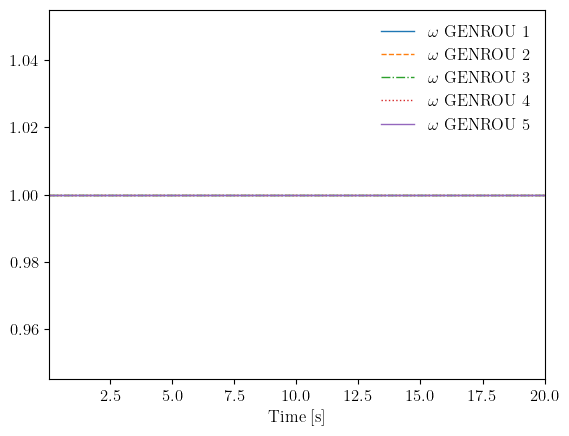

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [11]:
ss0.TDS.plt.plot(ss0.GENROU.omega)

Base case is okay.

## Case1

In [12]:
ss1.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0042 seconds.
0: |F(x)| = 8.6568834
1: |F(x)| = 7.007197233
2: |F(x)| = 1.365637093
3: |F(x)| = 0.1659350293
4: |F(x)| = 0.003034072009
5: |F(x)| = 9.897107126e-07
Converged in 6 iterations in 0.0048 seconds.


True

Power flow solved.

In [13]:
ss1i = ss1.TDS.init()

Initialization for dynamics completed in 0.0359 seconds.
Initialization was successful.


TDS initialized.

## Case2

In [14]:
ss2.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0041 seconds.
0: |F(x)| = 15.44601457
1: |F(x)| = 87.13552781
2: |F(x)| = 51.0391057
3: |F(x)| = 14.27050865
4: |F(x)| = 3.188620159
5: |F(x)| = 0.5200860572
6: |F(x)| = 0.1319546069
7: |F(x)| = 0.02833026213
8: |F(x)| = 0.007088256276
9: |F(x)| = 0.001772020979
10: |F(x)| = 0.0004430050393
11: |F(x)| = 0.0001107512598
12: |F(x)| = 2.768781496e-05
13: |F(x)| = 6.92195374e-06
14: |F(x)| = 1.730488435e-06
15: |F(x)| = 4.326221087e-07
Converged in 16 iterations in 0.0148 seconds.


True

Power flow solved.

In [15]:
ss2i = ss2.TDS.init()

GENROU (vf range) out of typical upper limit.

   idx    | values | limit
----------+--------+------
 GENROU_1 | 7.000  | 5    
 GENROU_2 | 11.206 | 5    
 GENROU_3 | 5.413  | 5    
 GENROU_4 | 36.426 | 5    
 GENROU_5 | 12.359 | 5    


ESST3A.VG_lim: adjusted limit <VGMAX>

   Idx    | Input  | Old Limit
----------+--------+----------
 ESST3A_2 | 7.000  | 3.860    
 ESST3A_3 | 5.413  | 3.860    
 ESST3A_4 | 36.426 | 3.860    
 ESST3A_5 | 12.359 | 3.860    


ESST3A.VB_lim: adjusted limit <VBMAX>

   Idx    | Input | Old Limit
----------+-------+----------
 ESST3A_4 | 7.352 | 5.480    


PQ.vcmp out of limits <vmin>

 idx   | Flag | Input Value | Limit
-------+------+-------------+------
 PQ_3  | zl   | 0.772       | 0.800
 PQ_4  | zl   | 0.782       | 0.800
 PQ_6  | zl   | 0.000       | 0.800
 PQ_7  | zl   | -0.000      | 0.800
 PQ_8  | zl   | 0.000       | 0.800
 PQ_11 | zl   | 0.369       | 0.800


ESST3A.HLI out of limits <VIMAX>

   idx    | Flag | Input Value | Limit
----------+

TDS initialization failed.

The Eqn. Mismatch items are associated with ``LL_y TGOV1`` and ``vil ESST3A``.
In the Model Reference or the model source code, it can be noticed that: 

1. ``LL_y TGOV1`` is associated with function ``LAG``, and ``LAG`` is limited by ``VMIN`` and ``VMAX``.

1. ``vil ESST3A`` is associated with ``HIL``, and ``HIL`` is limited by ``VIMIN`` and ``VIMAX``.

Usually, the failed initialization is caused by the inapproriate limiter range, and it can be addressed by adjusting the range.


In [16]:
ss2.TGOV1.as_df()

,idx,u,name,syn,Tn,wref0,R,VMAX,VMIN,T1,T2,T3,Dt
uid,,,,,,,,,,,,,
0,TGOV1_1,1.0,TGOV1_1,GENROU_1,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0
1,TGOV1_2,1.0,TGOV1_2,GENROU_2,0.0,1.0,0.05,1.20,0.0,0.10,1.0,2.1,0.0
2,TGOV1_3,1.0,TGOV1_3,GENROU_3,0.0,1.0,0.05,1.20,0.0,0.10,1.0,2.1,0.0
3,TGOV1_4,1.0,TGOV1_4,GENROU_4,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0
4,TGOV1_5,1.0,TGOV1_5,GENROU_5,0.0,1.0,0.05,1.05,0.3,0.05,1.0,2.1,0.0


In [17]:
ss2.ESST3A.as_df()

,idx,u,name,syn,TR,VIMAX,VIMIN,KM,TC,TB,...,KP,KI,VBMAX,KC,XL,VGMAX,THETAP,TM,VMMAX,VMMIN
uid,,,,,,,,,,,,,,,,,,,,,
0,ESST3A_2,1.0,ESST3A_2,GENROU_1,0.02,0.2,-0.2,8.0,1.0,5.0,...,3.67,0.435,5.480000,0.01,0.0098,7.000318,3.33,0.4,99.0,0.0
1,ESST3A_3,1.0,ESST3A_3,GENROU_3,0.02,0.2,-0.2,8.0,1.0,5.0,...,3.67,0.435,5.480000,0.01,0.0098,5.413357,3.33,0.4,99.0,0.0
2,ESST3A_4,1.0,ESST3A_4,GENROU_4,0.02,0.2,-0.2,8.0,1.0,5.0,...,3.67,0.435,7.352355,0.01,0.0098,36.425544,3.33,0.4,99.0,0.0
3,ESST3A_5,1.0,ESST3A_5,GENROU_5,0.02,0.2,-0.2,8.0,1.0,5.0,...,3.67,0.435,5.480000,0.01,0.0098,12.359430,3.33,0.4,99.0,0.0


We can try to enlarge ``VMAX`` and ``VMIN`` of device ``TGOV1_1``.

However, it should be noted that since ``ss2`` has been initialziaed, we need to re-instantiate a new one.

In [18]:
sc2 = andes.load(case2,
                 default_config=True,
                 no_output=True)


Working directory: "/Users/jinningwang/Documents/work/psal/src/notes/discussion386"
> Reloaded generated Python code of module "pycode".
Parsing input file "./ieee14_1.00_Line_12_0.90_1.00_1.30.xlsx"...
Input file parsed in 0.0350 seconds.
System internal structure set up in 0.0194 seconds.


In [19]:
sc2.TGOV1.set(idx='TGOV1_1', src='VMAX', attr='v', value=10)
sc2.TGOV1.set(idx='TGOV1_1', src='VMIN', attr='v', value=0)


True

Similarly, we can try to enlarge ``VIMAX`` and ``VIMIN`` of device ``ESST3A_2`` - ``ESST3A_5``.

In [20]:
sc2.ESST3A.set(idx=['ESST3A_2', 'ESST3A_3', 'ESST3A_4', 'ESST3A_5'],
               src='VIMAX', attr='v',
               value=[10, 10, 10, 10])

sc2.ESST3A.set(idx=['ESST3A_2', 'ESST3A_3', 'ESST3A_4', 'ESST3A_5'],
               src='VIMIN', attr='v',
               value=[-10, -10, -10, -10])


True

In [21]:
sc2.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0035 seconds.
0: |F(x)| = 15.44601457
1: |F(x)| = 87.13552781
2: |F(x)| = 51.0391057
3: |F(x)| = 14.27050865
4: |F(x)| = 3.188620159
5: |F(x)| = 0.5200860572
6: |F(x)| = 0.1319546069
7: |F(x)| = 0.02833026213
8: |F(x)| = 0.007088256276
9: |F(x)| = 0.001772020979
10: |F(x)| = 0.0004430050393
11: |F(x)| = 0.0001107512598
12: |F(x)| = 2.768781496e-05
13: |F(x)| = 6.92195374e-06
14: |F(x)| = 1.730488435e-06
15: |F(x)| = 4.326221087e-07
Converged in 16 iterations in 0.0133 seconds.


True

Now, Case2 can be initialized successfully.

In [22]:
sc2i = sc2.TDS.init()

GENROU (vf range) out of typical upper limit.

   idx    | values | limit
----------+--------+------
 GENROU_1 | 7.000  | 5    
 GENROU_2 | 11.206 | 5    
 GENROU_3 | 5.413  | 5    
 GENROU_4 | 36.426 | 5    
 GENROU_5 | 12.359 | 5    


ESST3A.VG_lim: adjusted limit <VGMAX>

   Idx    | Input  | Old Limit
----------+--------+----------
 ESST3A_2 | 7.000  | 3.860    
 ESST3A_3 | 5.413  | 3.860    
 ESST3A_4 | 36.426 | 3.860    
 ESST3A_5 | 12.359 | 3.860    


ESST3A.VB_lim: adjusted limit <VBMAX>

   Idx    | Input | Old Limit
----------+-------+----------
 ESST3A_4 | 7.352 | 5.480    


PQ.vcmp out of limits <vmin>

 idx   | Flag | Input Value | Limit
-------+------+-------------+------
 PQ_3  | zl   | 0.772       | 0.800
 PQ_4  | zl   | 0.782       | 0.800
 PQ_6  | zl   | 0.000       | 0.800
 PQ_7  | zl   | -0.000      | 0.800
 PQ_8  | zl   | 0.000       | 0.800
 PQ_11 | zl   | 0.369       | 0.800


Initialization for dynamics completed in 0.0431 seconds.
Initialization was successf

## Case3

In [23]:
ss3.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0045 seconds.
0: |F(x)| = 29.31915012
1: |F(x)| = 740.0002552
2: |F(x)| = 184.73335
3: |F(x)| = 45.4526586
4: |F(x)| = 12.50794975
5: |F(x)| = 15.21453027
6: |F(x)| = 10.05942967
7: |F(x)| = 13.6198424
8: |F(x)| = 35.59468791
9: |F(x)| = 8.482557777
10: |F(x)| = 10.19243591
11: |F(x)| = 14.28187555
12: |F(x)| = 254.4118701
13: |F(x)| = 79.94222585
14: |F(x)| = 20.04949698
15: |F(x)| = 5.258361918
16: |F(x)| = 9.366233315
17: |F(x)| = 5.526124391
18: |F(x)| = 349.5718574
19: |F(x)| = 78.48764735
20: |F(x)| = 18.53143708
21: |F(x)| = 4.176938381
22: |F(x)| = 5.683208964
23: |F(x)| = 2.565099663
24: |F(x)| = 4.096922485
25: |F(x)| = 4.606136474
26: |F(x)| = 3.909243837
Power flow failed after 27 iterations for "

False

Power flow failed.

In [24]:
sc3 = andes.load(case3,
                 default_config=True,
                 no_output=True)


Working directory: "/Users/jinningwang/Documents/work/psal/src/notes/discussion386"
> Reloaded generated Python code of module "pycode".
Parsing input file "./ieee14_1.00_Line_12_0.95_1.00_1.30.xlsx"...
Input file parsed in 0.0330 seconds.
System internal structure set up in 0.0195 seconds.


In [25]:
ss0.Bus.as_df().iloc[-3:]

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
11,12,1.0,BUS12,138.0,1.1,0.9,0.98639,-0.128934,0,0,2,2,2
12,13,1.0,BUS13,138.0,1.1,0.9,0.98403,-0.133786,0,0,2,2,2
13,14,1.0,BUS14,138.0,1.1,0.9,0.99063,-0.166916,0,0,2,2,2


In [26]:
sc3.Bus.as_df().iloc[-3:]

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
12,13,1.0,BUS13,138.0,1.1,0.9,0.98403,-0.133786,0,0,2.0,2.0,2.0
13,14,1.0,BUS14,138.0,1.1,0.9,0.99063,-0.166916,0,0,2.0,2.0,2.0
14,15,1.0,BUS15,138.0,1.1,0.9,1.00000,0.000000,0,0,NaN,NaN,NaN


Compared to the original Case0, Case3 inserts a new device ``BUS15`` with ``v0`` and ``a0`` being set as default values.

This might be the reason why the power flow failed.

We can try to adjust those values to fix the power flow.


In [27]:
sc3.Bus.set(idx=15, src='v0', attr='v', value=0.99)
sc3.Bus.set(idx=15, src='a0', attr='v', value=-0.1)


True

In [28]:
sc3.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0031 seconds.
0: |F(x)| = 6.171679059
1: |F(x)| = 0.8778049877
2: |F(x)| = 0.05516065719
3: |F(x)| = 0.0001907369157
4: |F(x)| = 2.026405849e-09
Converged in 5 iterations in 0.0072 seconds.


True

In [29]:
sc3i = sc3.TDS.init()

Initialization for dynamics completed in 0.0266 seconds.
Initialization was successful.


Now the power flow can be solved and the TDS can be initialized successfully.